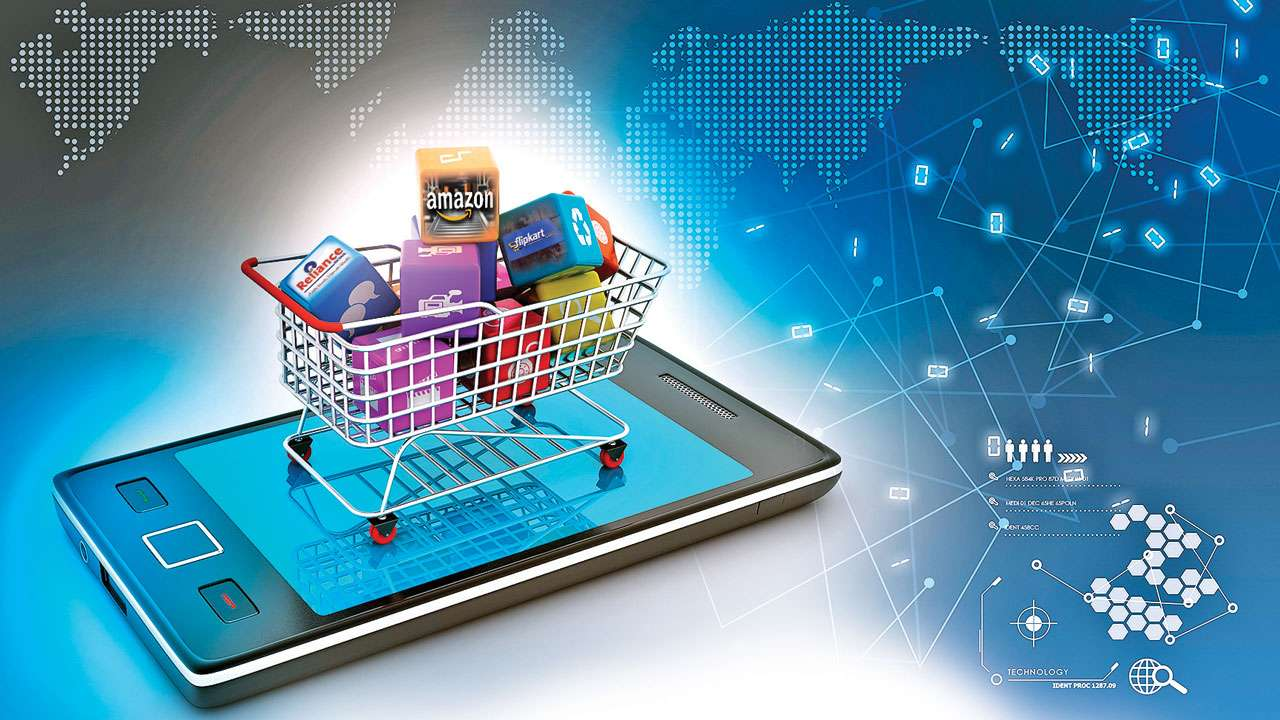




# Project Description

## The Challenge

You are part of a Data Scientists team from the All In One Place company, that needs to determine who are the clients eligible to participate of the “Insiders Program”. With this clients list on hand, the marketing team will a sequency of a custom and exclusive actions for this group, in order to rise the revenues and the purchase frequency. 
As result for this project is expected that you deliver a list with eligible clients to participate of the “Insiders Program”, as well a report answering the following questions:

1. Who are the elegible people to participate in the “Insiders Program”?
2. How many clients will be part of the group?
3. Which are the main caracteristics for the group?
4. Which is the revenues percentage that comes from the group?
5. Which are the expected revenues from this group for the next months?
6. Which are the conditions to a client be eligible for the “Insiders”?
7. Which are the conditions to a client be removed from the “Insiders”?
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
9. Which actions the marketing team can perform in order to improve the income?

## The Data

The data set is available on the Kaggle platform, through this link:

https://www.kaggle.com/vik2012kvs/high-value-customers-identification

Each row represents a sell transaction that happened between November 2016 and December 2017. The dataset includes the following informations:

• **Invoice Number:** unique id from each purchase.

• **Stock Code Product:** item code.

• **Description Product:** item name.

• **Quantity:** the quantity of each item purchased per transaction.

• **Invoice Date:** the day that the purchase occurred.

• **Unit Price:** product price per unit.

• **Customer ID:** client id.

• **Country:** the client country.

## Soluction Planning

### IOT Planning

#### Input



1. Businnes Problem
    - Select the high value customers.
    
2. Dataset.
    - Sales in a 1 year period.

#### Output



1. Customers identification for Insiders Program.
    - Insiders Programs Customers list.
    
2. Report.
    - Businnes questions answers. 
    
        1. Who are the elegible people to participate in the “Insiders Program”?
        2. How many clients will be part of the group?
        3. Which are the main caracteristics for the group?
        4. Which is the revenues percentage that comes from the group?
        5. Which are the expected revenues from this group for the next months?
        6. Which are the conditions to a client be eligible for the “Insiders”?
        7. Which are the conditions to a client be removed from the “Insiders”?
        8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
        9. Which actions the marketing team can perform in order to improve the income?

#### Tasks

1. Who are the elegible people to participate in the “Insiders Program”?
    - What is a "elegible customer" for the businnes?
        - Revenues
            - High AVG Ticket (AVG purchase value)
            - High LTV (Total purchase values)
            - Low recence (how oft the customer make a purchase)
            - High basket size.
            - Low churning probability.
            - High LTV prediction.
            - High propensity to buy.
            
        - Cost
            - Low return rate.
                        
        - Shopping experience
            - High AVG evaluation.
            
            
            
2. How many clients will be part of the group?
    - There is a limit of customer for the Insiders Program?
    - GRoup percentage.
    
    
3. Which are the main caracteristics for the group?
    - Age.
    - Location.
    - See question 1
    
4. Which is the revenues percentage that comes from the group?
    - Total year revenues.
    - Total Insiders group revenues.
    - Comparation.
    
5. Which are the expected revenues from this group for the next months?
    - Insiders group LVT.
    - Cohort analysis - time customer marker.

6. Which are the conditions to a client be eligible for the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be similar
    
7. Which are the conditions to a client be removed from the “Insiders”?
    - Define the model frequency 1, month, 2?, 3?)
    - The customers must to be dissimilar from insiders.
    
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
    - A/B test
    - A/B Beysian test 
    - Hipotesys tests.
9. Which actions the marketing team can perform in order to improve the income?
    - Discount.
    - Buy preference.
    - Free deliver.

#### Benchmark Solutions

1. Desk Research

    1. RFM Model
        - Recency
            - Time since the last purchase.
            - Responsivity.
           
        - Frequency
            - Avg time between transactions.
            - Engagement
            
        - Monetary
            - Total spend, revenues.
            - High value purchases.
            
Step 1
    - Order the groups by a feature.
    
Step 2
    - Divided the customers according to notes.
        - Notes between 1 - 5.
        - 5 groups
        
Step 3
    - Same as step  with other feature.
    
Step 4
    - Do the same with the last feature.
    
Step 5
    - Do the mean between the features scores.
    
    2. RFM Model segmentation
        Categorize customers by the RFM model.

# Imports, Configurations and Helper Functions

## Imports

In [1]:
import dash
import plotly
import random
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from IPython.display import HTML
from pandas_profiling import ProfileReport
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

## Configurations

In [2]:
warnings.filterwarnings('ignore')

SEED = 43

%matplotlib inline
%pylab inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 18

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot

pd.options.display.float_format = '{:.3f}'.format

Populating the interactive namespace from numpy and matplotlib


## Helper Functions

In [3]:
# Function to plot graphs titles and labels 
def info_plot(title, xlabel, ylabel):
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

# Function to plot values upside the barplot
def annot_plot(plot):
    for p in plot.patches:
        plot.annotate(format(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize = 14)
    return None

# Load Data

In [4]:
# Load data
data_path = r'C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\data\raw\Ecommerce.csv'

df_init = pd.read_csv(data_path)
df_init.head()

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16      2.550   17850.000  United Kingdom         NaN
1    536365     71053                  WHITE METAL LANTERN         6   29-Nov-16      3.390   17850.000  United Kingdom         NaN
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16      2.750   17850.000  United Kingdom         NaN
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16      3.390   17850.000  United Kingdom         NaN
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16      3.390   17850.000  United Kingdom         NaN

# Data Fist Look

In [5]:
print(f'\nROWS: {df_init.shape[0]}\n\nCOLUMNS: {df_init.shape[1]}.\n')


ROWS: 541909

COLUMNS: 9.



In [6]:
# NaN check

df_init.isna().sum()

# Drop NaN
# df_init.dropna(subset = ['Description', 'CustomerID'])

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

In [7]:
# Data Types 

df_init.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Unnamed: 8     float64
dtype: object

In [8]:
# Descriptive statistics

df_init.describe().T

count      mean      std        min       25%       50%       75%       max
Quantity   541909.000     9.552  218.081 -80995.000     1.000     3.000    10.000 80995.000
UnitPrice  541909.000     4.611   96.760 -11062.060     1.250     2.080     4.130 38970.000
CustomerID 406829.000 15287.691 1713.600  12346.000 13953.000 15152.000 16791.000 18287.000
Unnamed: 8      0.000       NaN      NaN        NaN       NaN       NaN       NaN       NaN

In [9]:
# Pandas Proffiling

report1 = ProfileReport(df_init, 'Insiders Program Dataset Report.')
report1

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## First Look Summary.

<span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span>
    
<span style="color:blue">2. The columns are in a weird order - reorder the columns..<span>
    
<span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span>
    
<span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span>
    
<span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span>   
    
<span style="color:blue">6. Check for discrepant information and outliers<span>

# Data Cleaning

In [10]:
df_init_2 = df_init.copy()

### <span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span> - DONE

In [11]:
df_init_2.drop(columns = 'Unnamed: 8', inplace = True)

In [12]:
df_init_2.head()

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16      2.550   17850.000  United Kingdom
1    536365     71053                  WHITE METAL LANTERN         6   29-Nov-16      3.390   17850.000  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16      2.750   17850.000  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   29-Nov-16      3.390   17850.000  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   29-Nov-16      3.390   17850.000  United Kingdom

### <span style="color:blue">2. The columns are in a weird order - reorder the columns.<span> - DONE

In [13]:
df_init_2 = df_init_2[['CustomerID', 'Country', 'InvoiceDate','InvoiceNo', 'Description', 'UnitPrice', 'StockCode', 'Quantity']]
df_init_2.head()

CustomerID         Country InvoiceDate InvoiceNo                          Description  UnitPrice StockCode  Quantity
0   17850.000  United Kingdom   29-Nov-16    536365   WHITE HANGING HEART T-LIGHT HOLDER      2.550    85123A         6
1   17850.000  United Kingdom   29-Nov-16    536365                  WHITE METAL LANTERN      3.390     71053         6
2   17850.000  United Kingdom   29-Nov-16    536365       CREAM CUPID HEARTS COAT HANGER      2.750    84406B         8
3   17850.000  United Kingdom   29-Nov-16    536365  KNITTED UNION FLAG HOT WATER BOTTLE      3.390    84029G         6
4   17850.000  United Kingdom   29-Nov-16    536365       RED WOOLLY HOTTIE WHITE HEART.      3.390    84029E         6

### <span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span> - DONE

In [14]:
df_init_2['InvoiceDate'] = pd.to_datetime(df_init_2['InvoiceDate'])

In [15]:
df_init_2.dtypes

CustomerID            float64
Country                object
InvoiceDate    datetime64[ns]
InvoiceNo              object
Description            object
UnitPrice             float64
StockCode              object
Quantity                int64
dtype: object

In [16]:
df_init_2.head()

CustomerID         Country InvoiceDate InvoiceNo                          Description  UnitPrice StockCode  Quantity
0   17850.000  United Kingdom  2016-11-29    536365   WHITE HANGING HEART T-LIGHT HOLDER      2.550    85123A         6
1   17850.000  United Kingdom  2016-11-29    536365                  WHITE METAL LANTERN      3.390     71053         6
2   17850.000  United Kingdom  2016-11-29    536365       CREAM CUPID HEARTS COAT HANGER      2.750    84406B         8
3   17850.000  United Kingdom  2016-11-29    536365  KNITTED UNION FLAG HOT WATER BOTTLE      3.390    84029G         6
4   17850.000  United Kingdom  2016-11-29    536365       RED WOOLLY HOTTIE WHITE HEART.      3.390    84029E         6

### <span style="color:blue">4. The columns "InvoiceNo" should be "INT" type.<span> - DONE
    
    - It was found some codes like "C536379" and it cant be directly tranformed into "INT" type.
    - The "C" before the numbers represents a "Discount" description.
    - It was separated the letter in the code from the numbers and creted a separated column for them - maybe they can be important later.
        - Column "some_code": 
    
        X - there was no letter before the number code.
        [C, A] - The letter code before the number.
    

In [17]:
len(df_init_2[df_init_2['Quantity'] < 0])

10624

In [18]:
print(f'There are {len(df_init_2.set_index("Description").loc["Discount"])} rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters')

There are 77 rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters


In [19]:
print(f'There are {len(df_init_2["Description"].unique())} diferent unique products descriptions.')
print(f'There are {len(df_init_2["StockCode"].unique())} diferent unique stock codes.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} diferent unique Invoice Numbers.')

There are 4224 diferent unique products descriptions.
There are 4070 diferent unique stock codes.
There are 25900 diferent unique Invoice Numbers.


In [20]:
normal = []
not_normal = []

In [21]:
for x in df_init_2['InvoiceNo']:
    if len(x) == 6:
        normal.append(x)
    else:
        not_normal.append(x)

In [22]:
print(f'There are {len(not_normal)} "InvoiceNo" with some letter before the numbers')

There are 9291 "InvoiceNo" with some letter before the numbers


In [23]:
# Created the "SOME_CODE" column, to split the "InvoiceNo" from some code before the numbers.

df_init_2['some_code'] = df_init_2['InvoiceNo'].apply(lambda x: "X" if len(x) == 6 else x[0])

In [24]:
# Separated the code (letter) before some "InvouceNo" from the number itself.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].apply(lambda x: x if len(x) == 6 else x[1:])

In [25]:
df_init_2.sample(5)

CustomerID         Country InvoiceDate InvoiceNo                        Description  UnitPrice StockCode  Quantity some_code
343043   17428.000  United Kingdom  2017-09-13    566929       GIANT 50'S CHRISTMAS CRACKER      2.890     23320        12         X
490204   17338.000  United Kingdom  2017-11-20    578041  ZINC HEART LATTICE T-LIGHT HOLDER      1.250     20846         6         X
349766   18236.000  United Kingdom  2017-09-19    567529         FAWN BLUE HOT WATER BOTTLE      3.750     21481         4         X
240857         NaN  United Kingdom  2017-06-25    558117      FRENCH BLUE METAL DOOR SIGN 2      2.460     22677         1         X
128001         NaN  United Kingdom  2017-03-20    547249        T-LIGHT HOLDER HANGING LACE      2.460     22217         1         X

In [26]:
df_init_2['some_code'].value_counts()

X    532618
C      9288
A         3
Name: some_code, dtype: int64

In [27]:
# Tranformed df_init_2['InvoiceNo'] into INTEGER.

df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].astype(int)

In [28]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [29]:
print(f'There are {len(df_init_2[df_init_2["Quantity"] < 0])} rows with negative quantity.')

There are 10624 rows with negative quantity.


### <span style="color:blue">5. There are some NaN values at the "Description" and "CustomerID".<span> - DONE
    
    - There are 135080 NaNs at the CustomerID column, almost 25% of all the dataset.
    
    OPTIONS:
    - input an ID for these customers based on the invoice number - each invoice number belongs to a customer.
    
    FINAL DECISION:
    - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
      It was decided to mantein the rows with NaN values.

In [30]:
df_init_2.isna().sum()

CustomerID     135080
Country             0
InvoiceDate         0
InvoiceNo           0
Description      1454
UnitPrice           0
StockCode           0
Quantity            0
some_code           0
dtype: int64

In [31]:
print(f'There are {df_init_2["CustomerID"].isna().sum()} rows with no data at the CustomerID column - ' 
      f'{round(df_init_2["CustomerID"].isna().sum()/len(df_init_2)*100, 2)}% of all dataset.')

There are 135080 rows with no data at the CustomerID column - 24.93% of all dataset.


In [32]:
print(f'There are {len(df_init_2["CustomerID"].unique())} unique customers ID in the dataset.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} invoice numbers in the dataset.')
print(f'\nThere are {len(df_init_2["InvoiceNo"].unique()) / len(df_init_2["CustomerID"].unique()):.2f} Invoice No for each CustomerID')

There are 4373 unique customers ID in the dataset.
There are 25900 invoice numbers in the dataset.

There are 5.92 Invoice No for each CustomerID


In [33]:
df_customer_NaN = df_init_2.set_index('CustomerID').loc[NaN]
df_customer_NaN.shape

(135080, 8)

In [34]:
df_customer_NaN['InvoiceNo'].value_counts().count()

3710

In [35]:
display(df_init_2.head())
display(df_init_2.tail())

CustomerID         Country InvoiceDate  InvoiceNo                          Description  UnitPrice StockCode  Quantity some_code
0   17850.000  United Kingdom  2016-11-29     536365   WHITE HANGING HEART T-LIGHT HOLDER      2.550    85123A         6         X
1   17850.000  United Kingdom  2016-11-29     536365                  WHITE METAL LANTERN      3.390     71053         6         X
2   17850.000  United Kingdom  2016-11-29     536365       CREAM CUPID HEARTS COAT HANGER      2.750    84406B         8         X
3   17850.000  United Kingdom  2016-11-29     536365  KNITTED UNION FLAG HOT WATER BOTTLE      3.390    84029G         6         X
4   17850.000  United Kingdom  2016-11-29     536365       RED WOOLLY HOTTIE WHITE HEART.      3.390    84029E         6         X

CustomerID Country InvoiceDate  InvoiceNo                      Description  UnitPrice StockCode  Quantity some_code
541904   12680.000  France  2017-12-07     581587      PACK OF 20 SPACEBOY NAPKINS      0.850     22613        12         X
541905   12680.000  France  2017-12-07     581587     CHILDREN'S APRON DOLLY GIRL       2.100     22899         6         X
541906   12680.000  France  2017-12-07     581587    CHILDRENS CUTLERY DOLLY GIRL       4.150     23254         4         X
541907   12680.000  France  2017-12-07     581587  CHILDRENS CUTLERY CIRCUS PARADE      4.150     23255         4         X
541908   12680.000  France  2017-12-07     581587    BAKING SET 9 PIECE RETROSPOT       4.950     22138         3         X

### <span style="color:blue">6. Check for discrepant information and outliers - DONE<span>
    
    - many of the data are not sales themselves, they can be shipping, postage, and other situations that are not sales.
   ~~- 14107 rows were excluded - 2.6% of the dataset.~~
    
    - "Negative quantity" are devolution and should be maintained in the dataset, so we will return them to the dataset.

In [36]:
df_init_2.describe().T

count       mean       std        min        25%        50%        75%        max
CustomerID 406829.000  15287.691  1713.600  12346.000  13953.000  15152.000  16791.000  18287.000
InvoiceNo  541909.000 559946.967 13421.287 536365.000 547896.000 560601.000 571779.000 581587.000
UnitPrice  541909.000      4.611    96.760 -11062.060      1.250      2.080      4.130  38970.000
Quantity   541909.000      9.552   218.081 -80995.000      1.000      3.000     10.000  80995.000

<AxesSubplot:xlabel='UnitPrice'>

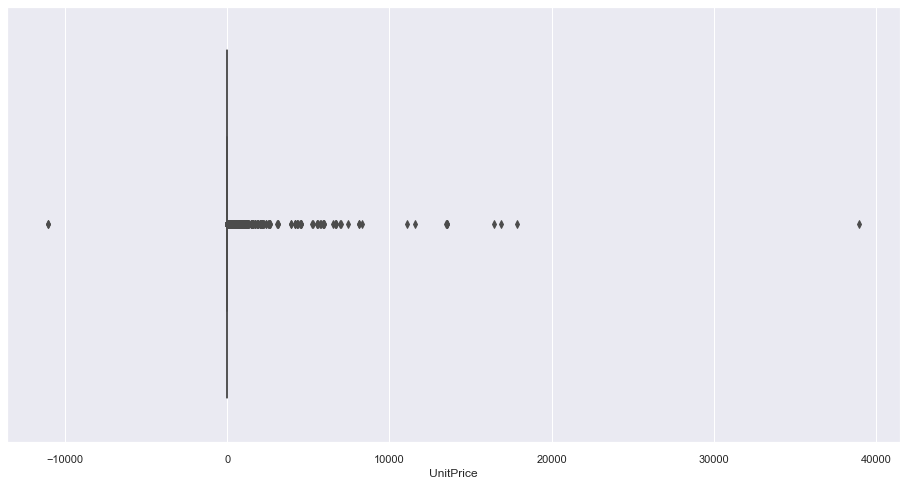

In [37]:
sns.boxplot(df_init_2['UnitPrice'])

In [38]:
print(f'There are {len(df_init_2[df_init_2["UnitPrice"] < 0])} negative prices at the dataset.')

There are 2 negative prices at the dataset.


In [39]:
df_init_2[df_init_2["UnitPrice"] < 0]

CustomerID         Country InvoiceDate  InvoiceNo      Description  UnitPrice StockCode  Quantity some_code
299983         NaN  United Kingdom  2017-08-10     563186  Adjust bad debt -11062.060         B         1         A
299984         NaN  United Kingdom  2017-08-10     563187  Adjust bad debt -11062.060         B         1         A

In [40]:
# Seeing the prices = 0

print(f'There are {len(df_init_2[df_init_2["UnitPrice"] == 0])} prices equal to zero at the dataset.')

There are 2515 prices equal to zero at the dataset.


In [41]:
# Excluding negative prices and prices == 0.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0]

In [42]:
df_init_2["UnitPrice"].min()

0.001

In [43]:
df_init_2[df_init_2["UnitPrice"] < 0.01]

CustomerID         Country InvoiceDate  InvoiceNo                 Description  UnitPrice     StockCode  Quantity some_code
157195   13952.000  United Kingdom  2017-04-13     550193  PADS TO MATCH ALL CUSHIONS      0.001          PADS         1         X
279045   15618.000  United Kingdom  2017-07-24     561226  PADS TO MATCH ALL CUSHIONS      0.001          PADS         1         X
359871   16198.000  United Kingdom  2017-09-23     568200  PADS TO MATCH ALL CUSHIONS      0.001          PADS         1         X
361741   13405.000  United Kingdom  2017-09-24     568375                Bank Charges      0.001  BANK CHARGES         1         X

In [44]:
# Excluging prices lower them 0.01.

df_init_2 = df_init_2[df_init_2["UnitPrice"] > 0.01]

In [45]:
df_init_2[df_init_2["UnitPrice"] > 10000]

CustomerID         Country InvoiceDate  InvoiceNo      Description  UnitPrice  StockCode  Quantity some_code
15016          NaN  United Kingdom  2016-12-05     537630       AMAZON FEE  13541.330  AMAZONFEE        -1         C
15017          NaN  United Kingdom  2016-12-05     537632       AMAZON FEE  13541.330  AMAZONFEE         1         X
16232          NaN  United Kingdom  2016-12-05     537644       AMAZON FEE  13474.790  AMAZONFEE        -1         C
16356          NaN  United Kingdom  2016-12-05     537651       AMAZON FEE  13541.330  AMAZONFEE        -1         C
43702          NaN  United Kingdom  2017-01-03     540117       AMAZON FEE  16888.020  AMAZONFEE        -1         C
43703          NaN  United Kingdom  2017-01-03     540118       AMAZON FEE  16453.710  AMAZONFEE        -1         C
222681   15098.000  United Kingdom  2017-06-08     556445           Manual  38970.000          M        -1         C
299982         NaN  United Kingdom  2017-08-10     563185  Adjust bad debt  11062.060          B         1         A
524601         NaN  United Kingdom  2017-12-03     580604       AMAZON FEE  11586.500  AMAZONFEE        -1         C
524602         NaN  United Kingdom  2017-12-03     580605       AMAZON FEE  17836.460  AMAZONFEE        -1         C

In [46]:
df_init_2.shape

(539387, 9)

In [47]:
df_init_2[df_init_2['UnitPrice'] > 5000].head()

CustomerID         Country InvoiceDate  InvoiceNo Description  UnitPrice  StockCode  Quantity some_code
15016         NaN  United Kingdom  2016-12-05     537630  AMAZON FEE  13541.330  AMAZONFEE        -1         C
15017         NaN  United Kingdom  2016-12-05     537632  AMAZON FEE  13541.330  AMAZONFEE         1         X
16232         NaN  United Kingdom  2016-12-05     537644  AMAZON FEE  13474.790  AMAZONFEE        -1         C
16313         NaN  United Kingdom  2016-12-05     537647  AMAZON FEE   5519.250  AMAZONFEE        -1         C
16356         NaN  United Kingdom  2016-12-05     537651  AMAZON FEE  13541.330  AMAZONFEE        -1         C

In [48]:
df_init_2.set_index('Description').loc['Manual'].head()

CustomerID         Country InvoiceDate  InvoiceNo  UnitPrice StockCode  Quantity some_code
Description                                                                                            
Manual        16274.000  United Kingdom  2016-11-29     536569      1.250         M         1         X
Manual        16274.000  United Kingdom  2016-11-29     536569     18.950         M         1         X
Manual              NaN  United Kingdom  2016-12-01     536865      2.550         M         1         X
Manual        14723.000  United Kingdom  2016-12-01     536981      0.850         M         2         X
Manual        17062.000  United Kingdom  2016-12-03     537077      0.420         M        12         X

In [49]:
print(f'There are {len(df_init_2.query("Quantity < 0"))} rows at "df_init_2" with negative quantities (devolutions)')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["AMAZON FEE"])} rows that are "AMAZON FEE", they are not sales.')

print(f'\nThere are {len(df_init_2.set_index("Description").loc["POSTAGE"])} rows as "POSTAGE" description and as the Amazon fees, they are not sales.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "DOTCOM POSTAGE"])} "DOTCOM POSTAGE" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Manual"])} "Manual" values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Adjust bad debt"])} "Adjust bad debt "values. It can not be included as sale.')

print(f'\nIt was found {len(df_init_2[df_init_2["Description"] == "Bank Charges"])} "Bank Charges" values. It can not be included as sale.')

print(f'\nThere was found many products description as "Manual", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["Manual"])} - it seems to be not normal sales.')

print(f'\nThere was found many products description as "CARRIAGE", with diferent prices - total rows: {len(df_init_2.set_index("Description").loc["CARRIAGE"])} - it are not a sales.')

print(f'\nThere are {len(df_init_2[df_init_2["Description"] == "CRUK Commission"])} rows as "CRUK Commission". It seems to be some kind of commission and are not sales.')

print(f'\n\n"C" some_code: {len(df_init_2.set_index("some_code").loc["C"])}\nQuantity < 0: {len(df_init_2.query("Quantity < 0"))}')
print('\n"C" code represents returns, negative values in the "Quantity" feature.')

There are 9287 rows at "df_init_2" with negative quantities (devolutions)

There are 34 rows that are "AMAZON FEE", they are not sales.

There are 1252 rows as "POSTAGE" description and as the Amazon fees, they are not sales.

It was found 707 "DOTCOM POSTAGE" values. It can not be included as sale.

It was found 566 "Manual" values. It can not be included as sale.

It was found 1 "Adjust bad debt "values. It can not be included as sale.

It was found 36 "Bank Charges" values. It can not be included as sale.

There was found many products description as "Manual", with diferent prices - total rows: 566 - it seems to be not normal sales.

There was found many products description as "CARRIAGE", with diferent prices - total rows: 143 - it are not a sales.

There are 16 rows as "CRUK Commission". It seems to be some kind of commission and are not sales.


"C" some_code: 9287
Quantity < 0: 9287

"C" code represents returns, negative values in the "Quantity" feature.


In [50]:
print(len(df_init_2.set_index("Description").loc["AMAZON FEE"]))
print(len(df_init_2.set_index("Description").loc["POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["Manual"]))
print(len(df_init_2.set_index("Description").loc["Adjust bad debt"]))
print(len(df_init_2.set_index("Description").loc["Bank Charges"]))
print(len(df_init_2.set_index("Description").loc["DOTCOM POSTAGE"]))
print(len(df_init_2.set_index("Description").loc["CARRIAGE"]))
print(len(df_init_2[df_init_2["Description"] == "CRUK Commission"]))

34
1252
566
8
36
707
143
16


In [51]:
# Separating the dataset into 2 datasets - sales and not sales.

df_not_sales = df_init_2.query('Description == ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE","CRUK Commission"]')
df_only_sales = df_init_2.query('Description != ["POSTAGE", "AMAZON FEE", "Manual", "Adjust bad debt", "Bank Charges", "DOTCOM POSTAGE","CARRIAGE", "CRUK Commission"]')

print(df_not_sales.shape)
print(df_only_sales.shape)

(2755, 9)
(536632, 9)


In [52]:
print(f'There are {len(df_only_sales.query("Quantity < 0"))} rows that are products returns at the sales dataset.')

There are 8841 rows that are products returns at the sales dataset.


In [53]:
len(df_only_sales.set_index("some_code").loc["C"])

8841

In [54]:
df_only_sales["some_code"].unique()

array(['X', 'C'], dtype=object)

In [55]:
len(df_only_sales) - len(df_init_2)

-2755

In [56]:
df_only_sales.describe()

CustomerID  InvoiceNo  UnitPrice   Quantity
count  404952.000 536632.000 536632.000 536632.000
mean    15295.180 559968.931      3.301      9.885
std      1710.328  13426.421      5.371    215.927
min     12346.000 536365.000      0.030 -80995.000
25%     13969.000 547903.000      1.250      1.000
50%     15159.000 560694.000      2.080      3.000
75%     16794.000 571828.000      4.130     10.000
max     18287.000 581587.000   1867.860  80995.000

<AxesSubplot:xlabel='UnitPrice'>

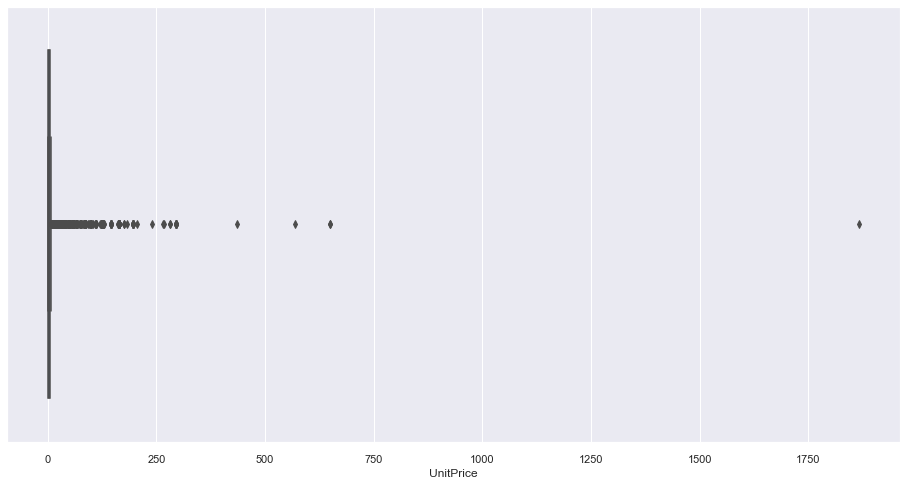

In [57]:
sns.boxplot(df_only_sales["UnitPrice"])

In [58]:
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].max()])
display(df_only_sales.set_index('UnitPrice').loc[df_only_sales["UnitPrice"].min()])

CustomerID                 17940.0
Country             United Kingdom
InvoiceDate    2017-04-06 00:00:00
InvoiceNo                   549452
Description               Discount
StockCode                        D
Quantity                        -1
some_code                        C
Name: 1867.86, dtype: object

CustomerID         Country InvoiceDate  InvoiceNo                          Description StockCode  Quantity some_code
UnitPrice                                                                                                                      
0.030       15838.000  United Kingdom  2016-11-30     536757  ROTATING SILVER ANGELS T-LIGHT HLDR     84347     -9360         C
0.030       12901.000  United Kingdom  2017-05-08     552569                             Discount         D      -240         C

In [59]:
len(df_only_sales.query('Description == ["Discount", "SAMPLES"]'))

139

In [60]:
print(f'Since our first look at the dataset we have excluded {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

Since our first look at the dataset we have excluded 5277 rows - 0.97% of the original dataset.


In [61]:
# Droping duplicate rows
df_only_sales.drop_duplicates(inplace = True)

In [62]:
print(f'After the drop duplicates rows we have removed {df_init.shape[0] - df_only_sales.shape[0]} rows - {((df_init.shape[0] - df_only_sales.shape[0]) / df_init.shape[0]) * 100:.2f}% of the original dataset.')

After the drop duplicates rows we have removed 10536 rows - 1.94% of the original dataset.


In [63]:
print(f'There was {10536 - 5227} duplicated rows at df_only_sales.')

There was 5309 duplicated rows at df_only_sales.


# Feature Engineering

In [64]:
df = df_only_sales.copy()

In [65]:
# Creating YEAR, MONTH and DAY_OF_WEEK Features.

# Year
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# Month
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Weekday
df['InvoiceDayWeek'] = df['InvoiceDate'].dt.dayofweek

# Total purchase value
df['TotalValue'] = df['UnitPrice'] * df['Quantity']

df.sample(5)

CustomerID         Country InvoiceDate  InvoiceNo                        Description  UnitPrice StockCode  Quantity some_code  InvoiceYear  InvoiceMonth  InvoiceDayWeek  TotalValue
447487         NaN  United Kingdom  2017-11-06     574950           3D SHEET OF DOG STICKERS      1.630    84559A         1         X         2017            11               0       1.630
25795    12753.000           Japan  2016-12-10     538397                  EASTER TIN BUCKET      2.100     21717        32         X         2016            12               5      67.200
229258   17642.000  United Kingdom  2017-06-14     557021     PINK  HEART SHAPE LOVE BUCKET       2.950     21564        10         X         2017             6               2      29.500
454500   14456.000  United Kingdom  2017-11-08     575583  3 WHITE CHOC MORRIS BOXED CANDLES      1.250    85034B         2         X         2017            11               2       2.500
491579   14505.000  United Kingdom  2017-11-20     578068         FAWN BLUE HOT WATER BOTTLE      3.750     21481         2         X         2017            11               0       7.500

In [66]:
# Reordering columns
df = df[['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'some_code', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']]

# Changing "some_code" to "SomeCode"
df.columns = ['CustomerID',	'Country', 'InvoiceNo', 'InvoiceDate', 'Description', 'StockCode', 'UnitPrice', 'Quantity', 'TotalValue', 'SomeCode', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDayWeek']

In [67]:
print(f'First dataset purchase: {df["InvoiceDate"].min()}.')
print(f'Last dataset purchase: {df["InvoiceDate"].max()}.')

First dataset purchase: 2016-11-29 00:00:00.
Last dataset purchase: 2017-12-07 00:00:00.


In [68]:
# Total sales at the first day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].min()])

3046

In [69]:
# Total sales at the last day of the dataset.

len(df.set_index("InvoiceDate").loc[df["InvoiceDate"].max()])

1617

## Building RFM Dataframe

In [70]:
# last Invoice Since (days)
# Today - it was used the day after the last date in the dataset.

today = pd.to_datetime('2017-12-08')

df['days_since_last_purchase'] = today - df['InvoiceDate']

# Transforming 'days_since_last_purchase' into iteger.
df['days_since_last_purchase'] = df['days_since_last_purchase'].apply(lambda x: x.days)

# Recency Score
# 5 - last 30 days. 4 - last 60 days. 3 - last 90 days. 2 - last 120 days. 1 - more tham 120 days.
df['recency'] = df['days_since_last_purchase'].apply(lambda x: 5 if x <= 30 else 4 if x > 30 and x <= 60 else 3 if x > 60 and x <= 90 else 2 if x > 90 and x <= 120 else 1)

# Frequency Score
# 5 - > 1000 purchases. 4 - <1000 and > 500 purchases. 3 - <500 and > 200 purchases. 2 - <200 and >100 purchases. 1 <100 purchases.
df['frequency'] = df['CustomerID'].map(dict(df['CustomerID'].value_counts()))
df['frequency'] = df['frequency'].apply(lambda x: 5 if x >= 1000 else 4 if x < 1000 and x >= 500 else 3 if x < 500 and x >= 200 else 2 if x < 200 and x >= 100 else 1)

# Creating a frequency dataframe
df_frequency = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].unique())
df_frequency.reset_index(inplace = True)
# Creating a list with the invoice frequency of each customer and create the frequency feature
df_frequency['frequency'] = [len(df_frequency['InvoiceNo'][i]) for i in range(len(df_frequency['InvoiceNo']))]
df_frequency.drop(columns = 'InvoiceNo', inplace = True)


recency = df.groupby('CustomerID')['recency'].max()
#frequency = df.groupby('CustomerID')['frequency'].max() - it was not removing the duplicates
#frequency = df_frequency['frequency'].values
monetary = df.groupby('CustomerID')['TotalValue'].sum()

df_RFM_score = pd.DataFrame([recency, monetary]).T

# creating "monetary_score" feature.
df_RFM_score['monetary_score'] = df_RFM_score['TotalValue'].apply(lambda x: 5 if x >= 10000 else 4 if x < 10000 and x >= 5000 else 3 if x < 5000 and x >= 1000 else 2 if x < 1000 and x >= 500 else 1)
df_RFM_score.drop(columns = 'TotalValue', inplace = True)

# Frequency_score
# Creating frequency_score - not the better way.
df_RFM_score['frequency_score'] = df_frequency['frequency'].values
# Creating scores
df_RFM_score['frequency_score'] = df_RFM_score['frequency_score'].apply(lambda x: 5 if x >= 15 else 4 if x <15 and x >= 10 else 3 if x < 10 and x >= 5 else 2)

# Reset index - Changing columns names
df_RFM_score.reset_index(inplace = True)
df_RFM_score.columns = ['CustomerID', 'recency_score', 'frequency_score', 'monetary_score']

# Converting dtypes as INT. 
df_RFM_score['recency_score'] = df_RFM_score['recency_score'].astype(int)
df_RFM_score['frequency_score'] = df_RFM_score['frequency_score'].astype(int)

# creating "RFM score" feature.
df_RFM_score['RFM_score'] = (df_RFM_score['recency_score'] + df_RFM_score['frequency_score'] + df_RFM_score['monetary_score']) / 3

In [71]:
df_RFM_score.sort_values('RFM_score', ascending = False).head()

CustomerID  recency_score  frequency_score  monetary_score  RFM_score
3733   17428.000              5                5               5      5.000
3916   17675.000              5                5               5      5.000
2324   15498.000              5                5               5      5.000
2791   16133.000              5                5               5      5.000
1058   13767.000              5                5               5      5.000

In [72]:
df_RFM_score['RFM_score'].value_counts()

1.333    862
2.667    654
2.333    462
3.000    446
3.667    402
2.000    386
3.333    371
1.667    291
4.000    205
4.333    116
4.667     93
5.000     74
Name: RFM_score, dtype: int64

# EDA

### Some Questions:

- What year had relatively the best sales?
    - 2017 has a slight sales advantage over 2016


- Which month was the best for sales?
    - Oktober was the best month, but it is hard to evaluate since we do not have at least 2 full year to have a comparison.


- Which day of is was the best for sales?
    - Wednesday is the best day, either Total sales of average sales by day of week.


- Which season is the best for sales?

- Top 10 product sales by quantity and values.

- Top 10 countryes - with and without England.

- Top 10 cheapest/expensive products.

- Sales proportion by prices.

In [73]:
# Pandas Proffiling test

report = ProfileReport(df, 'Insiders Program Dataset Report.')
report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
# Saving the report to further use.

local_path = r"C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\reports"

report.to_file(output_file = local_path + r'\df_cleaned_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

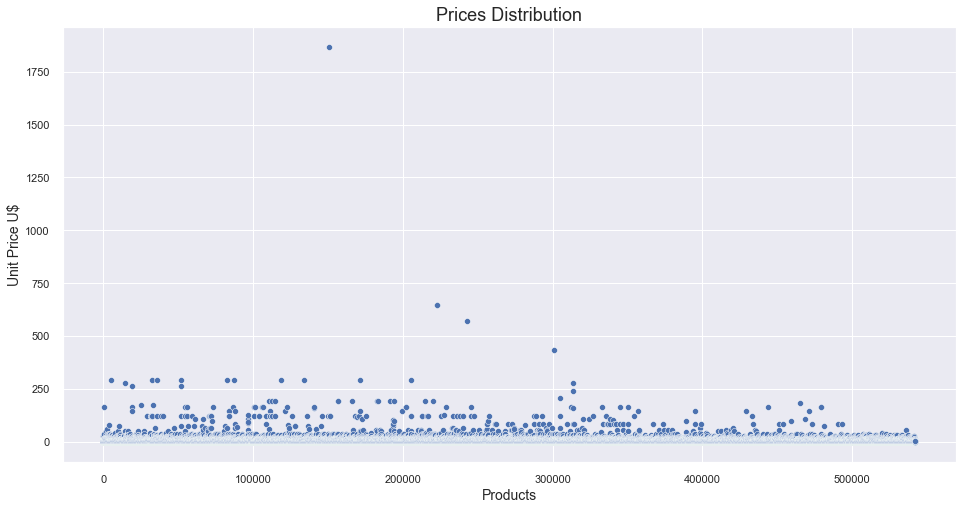

In [75]:
# Prices Distribution.

sns.scatterplot(x = df.index, y = df['UnitPrice'])
plt.title('Prices Distribution', fontsize = 18)
plt.xlabel('Products', fontsize = 14)
plt.ylabel('Unit Price U$', fontsize = 14);

In [76]:
# Grouping Total Invoice values by year to get the mean sale by invoice by year

year_group_mean = df.groupby('InvoiceYear')['TotalValue'].mean()
year_group_mean = pd.DataFrame(year_group_mean)
year_group_mean.reset_index(inplace = True)
year_group_mean

InvoiceYear  TotalValue
0         2016      18.239
1         2017      18.385

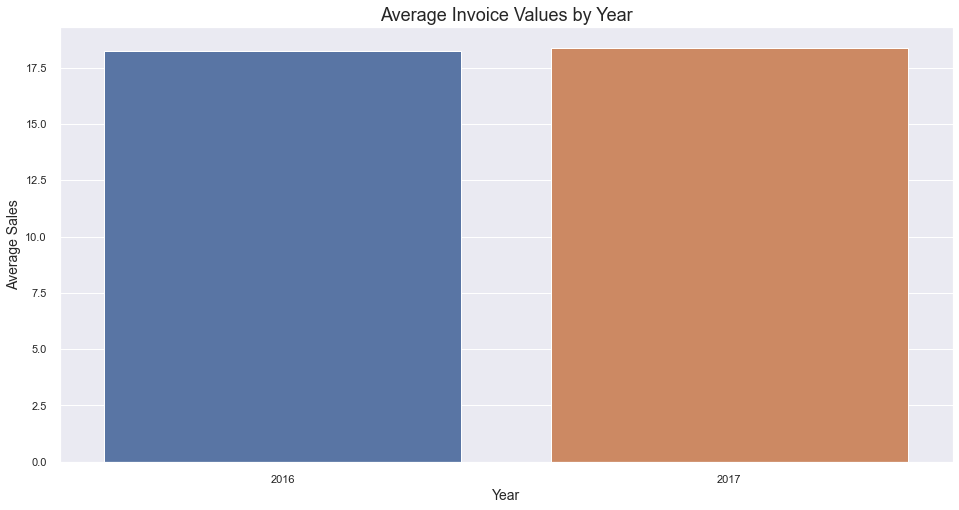

In [77]:
ax = sns.barplot(x = 'InvoiceYear', y = 'TotalValue',data = year_group_mean)
info_plot('Average Invoice Values by Year', 'Year', 'Average Sales')

In [78]:
# Grouping Total Sales by year 

year_group_sum = df.groupby('InvoiceYear')['TotalValue'].sum()
year_group_sum = pd.DataFrame(year_group_sum)
year_group_sum.reset_index(inplace = True)
year_group_sum

InvoiceYear  TotalValue
0         2016  757408.160
1         2017 9005863.240

In [79]:
# Grouping by year and by month

df_byMonth = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalValue'].sum()
df_byMonth = pd.DataFrame(df_byMonth)
df_byMonth.reset_index(inplace = True)
df_byMonth

# November 2016 - only 2 days of sales.
# December 2017 - only 7 days of sales.

InvoiceYear  InvoiceMonth  TotalValue
0          2016            11  103172.420
1          2016            12  654235.740
2          2017             1  626790.640
3          2017             2  493100.340
4          2017             3  659973.350
5          2017             4  463459.190
6          2017             5  774809.990
7          2017             6  684479.880
8          2017             7  710797.540
9          2017             8  729272.970
10         2017             9  946244.160
11         2017            10 1122611.090
12         2017            11 1459183.330
13         2017            12  335140.760

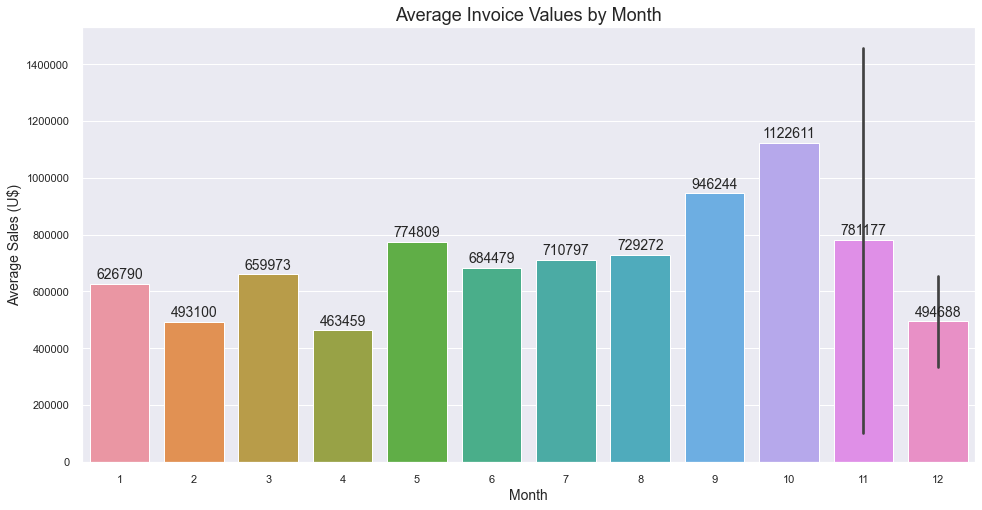

In [80]:
ax = sns.barplot(x = 'InvoiceMonth', y = 'TotalValue',data = df_byMonth)
info_plot('Average Invoice Values by Month', 'Month', 'Average Sales (U$)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
annot_plot(ax)

In [81]:
# There is no fridays at the dataset.

df['InvoiceDayWeek'].unique()

array([1, 2, 3, 5, 6, 0], dtype=int64)

In [82]:
df['InvoiceDayWeek'].value_counts(sort = False)

0     99908
1     92742
2    102032
3     80528
5     62658
6     93505
Name: InvoiceDayWeek, dtype: int64

In [83]:
# Input Fridays values

friday = [{'InvoiceDayWeek': 4, 'TotalValue': 0, 'AVG_by_day': 0}]
friday = pd.DataFrame(friday)
friday

InvoiceDayWeek  TotalValue  AVG_by_day
0               4           0           0

In [84]:
# groupng by day of week

df_by_DayOfWeek_group = df.groupby('InvoiceDayWeek')['TotalValue'].sum()
df_by_DayOfWeek = pd.DataFrame(df_by_DayOfWeek_group)
df_by_DayOfWeek.reset_index(inplace = True)
df_by_DayOfWeek['AVG_by_day'] = df.groupby('InvoiceDayWeek')['TotalValue'].mean().values

In [85]:
df_by_DayOfWeek = pd.concat([df_by_DayOfWeek, friday], sort = True)
# df_by_DayOfWeek.columns = ['InvoiceDayWeek', 'TotalValue', 'AVG_by_day']
df_by_DayOfWeek.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [86]:
# There is none Fridays at the dataset.

df_by_DayOfWeek.reset_index(inplace = True, drop = True)
df_by_DayOfWeek

AVG_by_day  InvoiceDayWeek  TotalValue
0      19.682               0 1966371.340
1      18.740               1 1737970.680
2      20.377               2 2079089.510
3      19.477               3 1568430.470
4       0.000               4       0.000
5      12.613               5  790332.190
6      17.337               6 1621077.210

In [87]:
df_by_DayOfWeek_group2 = df.groupby(['InvoiceDate', 'InvoiceDayWeek'])['TotalValue'].sum()
df_by_DayOfWeek2 = pd.DataFrame(df_by_DayOfWeek_group2)
df_by_DayOfWeek2.reset_index(inplace = True)

In [88]:
df_by_DayOfWeek2.head()

InvoiceDate  InvoiceDayWeek  TotalValue
0  2016-11-29               1   57117.100
1  2016-11-30               2   46055.320
2  2016-12-01               3   43465.650
3  2016-12-03               5   30517.670
4  2016-12-04               6   50701.250

In [89]:
# Finding mean sales by day of week

df_by_DayOfWeek_group3 = df_by_DayOfWeek2.groupby('InvoiceDayWeek')['TotalValue'].mean()
df_by_DayOfWeek3 = pd.DataFrame(df_by_DayOfWeek_group3)
df_by_DayOfWeek3.reset_index(inplace = True)
df_by_DayOfWeek3 = pd.concat([df_by_DayOfWeek3, friday], sort = True)
df_by_DayOfWeek3.drop(columns = 'AVG_by_day', inplace = True)
df_by_DayOfWeek3.sort_values(by = 'InvoiceDayWeek', inplace = True)

In [90]:
df_by_DayOfWeek3.columns = ['InvoiceDayWeek', 'AVG_by_day']
df_by_DayOfWeek3

InvoiceDayWeek  AVG_by_day
0               0   37814.833
1               1   32791.900
2               2   39228.104
3               3   31368.609
0               4       0.000
4               5   15806.644
5               6   34491.004

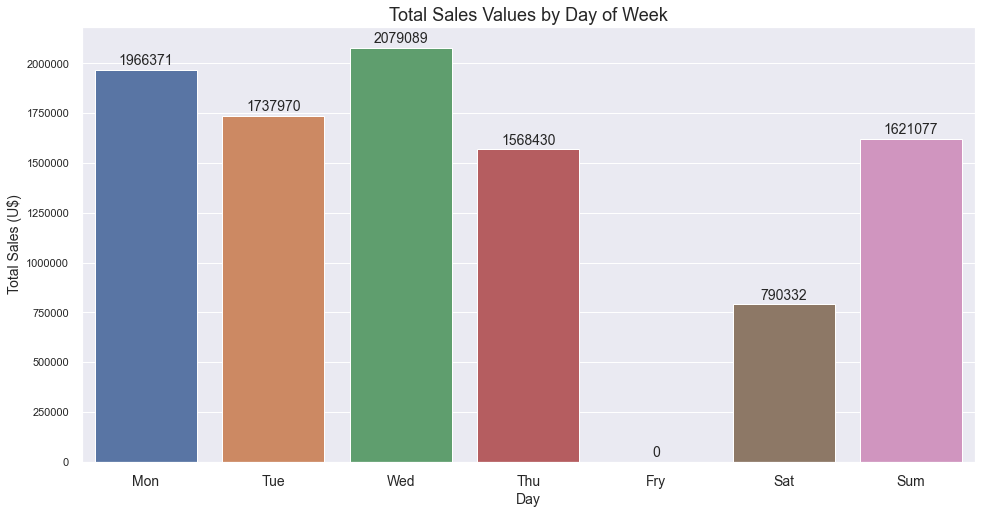

In [91]:
ax1 = sns.barplot(x = df_by_DayOfWeek['InvoiceDayWeek'], y = df_by_DayOfWeek['TotalValue'])
info_plot('Total Sales Values by Day of Week', 'Day', 'Total Sales (U$)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax1)

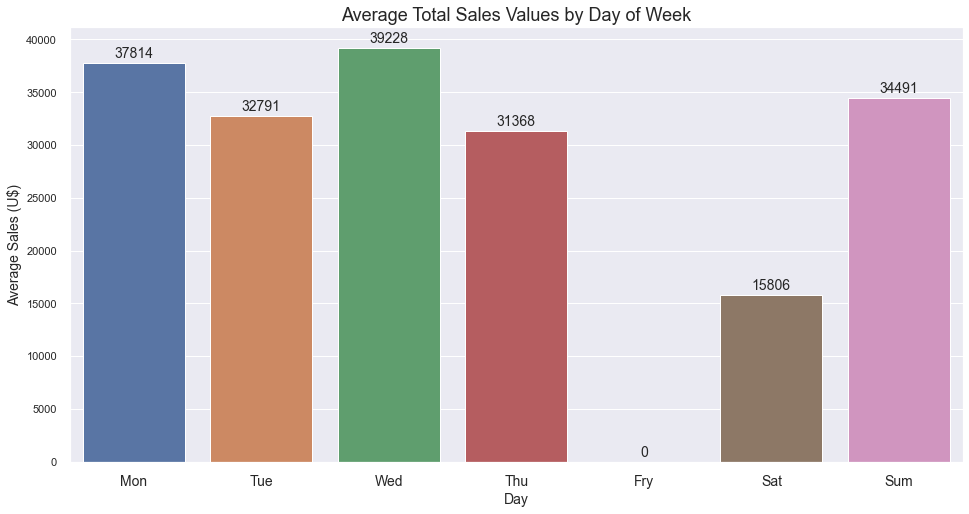

In [92]:
ax2 = sns.barplot(x = df_by_DayOfWeek3['InvoiceDayWeek'], y = df_by_DayOfWeek3['AVG_by_day'])
info_plot('Average Total Sales Values by Day of Week', 'Day', 'Average Sales (U$)')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fry', 'Sat', 'Sum'], fontsize = 14)
annot_plot(ax2)

# Data Preparation

# Feature Selection

# Hyperparameter Fine-Tunning

In [93]:
df_HP = df_RFM_score.copy()
df_HP.drop(columns =['CustomerID', 'RFM_score'], inplace = True)

In [94]:
df_HP.head()

recency_score  frequency_score  monetary_score
0              1                1               2
1              5                3               3
2              3                3               2
3              5                3               2
4              1                1               2

## Within Cluster Sum of Square - WSS

    - WSS does not take into account the distance between clusters

### Roth method

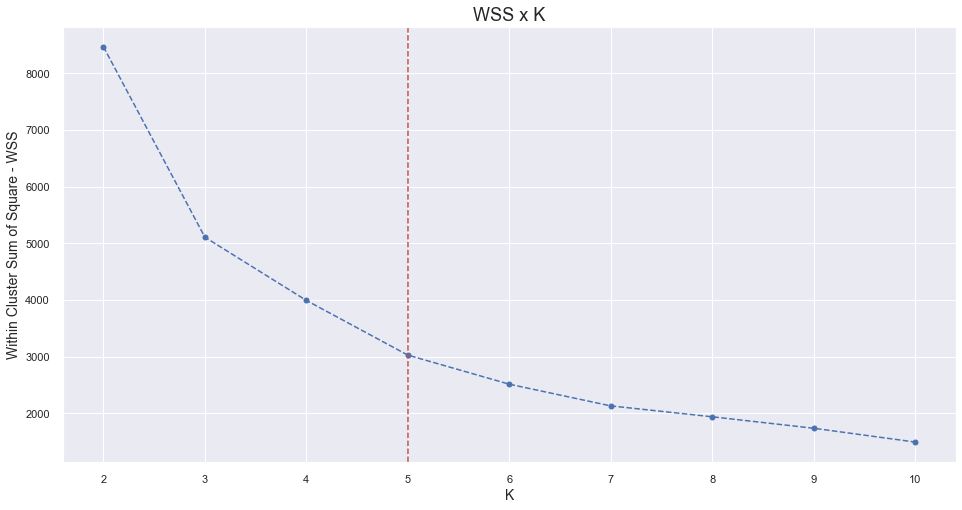

In [95]:
# Find best K.

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
wss = []

for k in clusters:
    # model definition
    kmeans = KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)
    
    # Model Training
    kmeans.fit(df_HP)
    
    # Validation
    wss.append(kmeans.inertia_)
    
# Plot    
plt.plot(clusters, wss, linestyle = '--', marker = 'o', color = 'b')
plt.title('WSS x K', fontsize = 18)
plt.ylabel('Within Cluster Sum of Square - WSS', fontsize = 14)
plt.xlabel('K', fontsize = 14)
plt.axvline(5, linestyle = '--', color = 'r');

### Yellow-Brick method

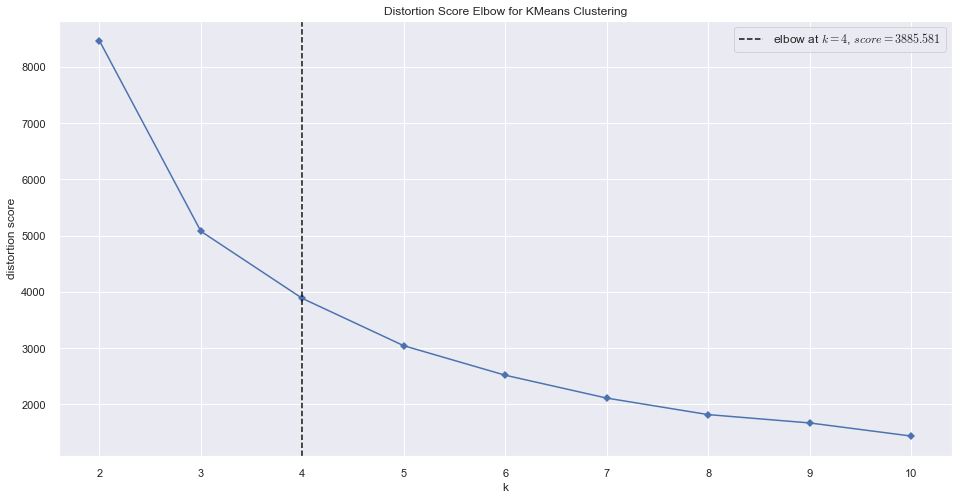

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
kmeans2 = KElbowVisualizer(KMeans(), k = clusters, timings = False)
kmeans2.fit(df_HP)
kmeans2.show()

## Silhouette Score

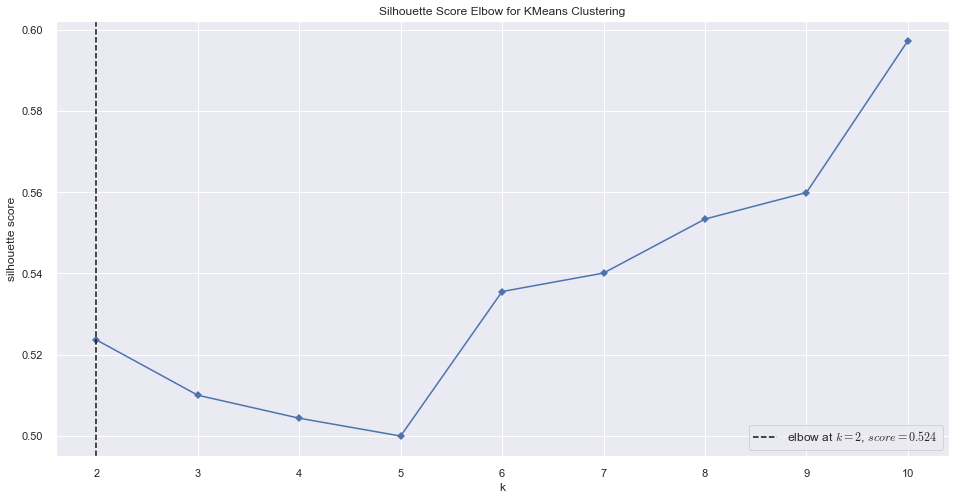

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [97]:
kmeans2 = KElbowVisualizer(KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans2.fit(df_HP)
kmeans2.show()

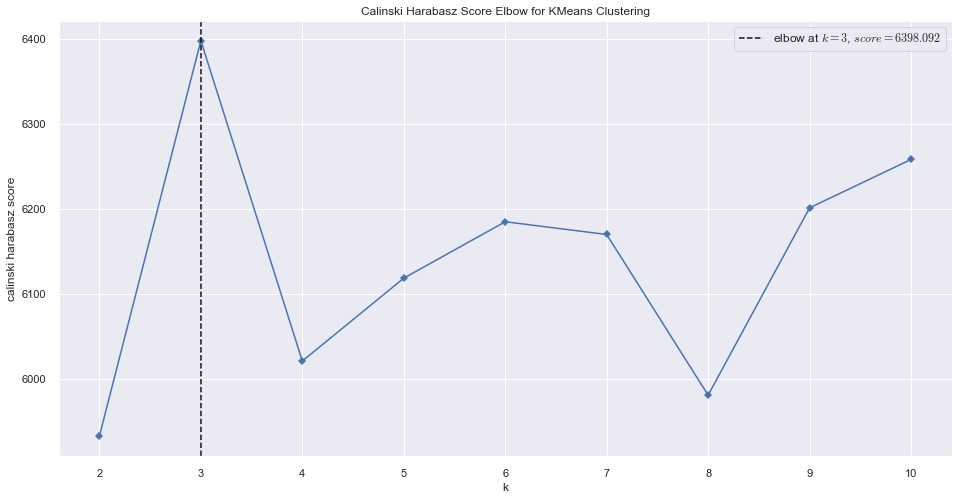

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [98]:
kmeans2 = KElbowVisualizer(KMeans(), k = clusters, metric = 'calinski_harabasz', timings = False)
kmeans2.fit(df_HP)
kmeans2.show()

In [99]:
kmeans.labels_

array([1, 2, 7, ..., 5, 6, 4])

df.head()

# Models Tests

## RFM Dataset.

### "Manual" Clustering - RFM dataset.

In [100]:
# Manually clustering the df_RFM dataset - clients with RFM Score upper than 4 are abble to be at the "Insiders Program"

df_insider_RFM = df_RFM_score[df_RFM_score['RFM_score'] >= 4]
df_insider_RFM.reset_index(inplace = True, drop = True)
print(f'Accordingly with the "manual" clustering, {(df_insider_RFM.shape[0] / df_RFM_score.shape[0]) * 100:.2f}% of the clients are elegible to the "Insiders Program".')

Accordingly with the "manual" clustering, 11.19% of the clients are elegible to the "Insiders Program".


### RFM Feature Selection

In [101]:
df_RFM = df_RFM_score.drop(columns = ['CustomerID', 'RFM_score'])
df_RFM.head()

recency_score  frequency_score  monetary_score
0              1                1               2
1              5                3               3
2              3                3               2
3              5                3               2
4              1                1               2

### KMeans - df_RFM

In [102]:
# Instancing model

k = 2

RFM_Kmeans = KMeans(n_clusters = k)
RFM_Kmeans.fit(df_RFM)
labels = RFM_Kmeans.labels_

In [103]:
# RFM KMeans clustering - 2D plot - 2 clusters

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], mode = 'markers',
                         marker = dict(color = RFM_Kmeans.labels_.astype(np.float)), text = labels))

fig.show()

In [104]:
# RFM KMeans clustering - 3D plot - 2 clusters

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], z = df_RFM['monetary_score'],
                          mode = 'markers', marker = dict(color = labels.astype(np.float)),
                          text = labels))

fig.show()

#### RFM - KMeans metrics - Silouette Score

In [105]:
k_clusters = [i for i in range(2, 10)]

silhouette_score_values = []
silhouette_score_values2 = []

for k in k_clusters:
    RFM_Kmeans = KMeans(n_clusters = k)
    labels = RFM_Kmeans.fit_predict(df_RFM)
    silhouette_score_values.append(silhouette_score(df_RFM, labels))
    silhouette_score_values2.append([k, silhouette_score(df_RFM, labels)])

In [106]:
SC = pd.DataFrame(silhouette_score_values2, columns = ['K', 'silhouette_score'])
SC.style.highlight_max(color = 'darkorange')

In [107]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = silhouette_score_values))

fig.update_layout(title = 'Mean Silhouette Values', xaxis_title = 'Number of Clusters', yaxis_title = 'Mean Silhouette Value')
fig.add_vline(x = 2)

fig.show()

Accordingly to Silhouette Score metric, a higher Silhouette Coefficient score relates to a model with better defined clusters. The more closer to 1, the better. The best k for the RFM dataset is 2 or more then 6 clusters.

#### RFM - KMeans metrics - Davies-Bouldin Index

In [108]:
k_clusters = [i for i in range(2, 10)]

davies_bouldin = []
davies_bouldin2 = []

for k in k_clusters:
    RFM_Kmeans = KMeans(n_clusters = k)
    labels = RFM_Kmeans.fit_predict(df_RFM)
    davies_bouldin.append(davies_bouldin_score(df_RFM, labels))
    davies_bouldin2.append([k, davies_bouldin_score(df_RFM, labels)])

In [109]:
DBI = pd.DataFrame(davies_bouldin2, columns = ['K', 'davies_bouldin_index'])
DBI.style.highlight_min(color = 'green')

In [110]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = davies_bouldin))

fig.update_layout(title = 'Davies-Bouldin Index', xaxis_title = 'Number of Clusters', yaxis_title = 'Davies-Bouldin Index')
#fig.add_vline(x = 2)

fig.show()

Accordingly to Davies Bouldin Index metric, a lower Davies-Bouldin index reports to a model with better separation between the clusters. The more the score is closer to 0 (minimum), better. The best k for the RFM dataset is 2 or 9 clusters.

#### RFM - KMeans metrics - Calinski Harabasz Index

In [111]:
k_clusters = [i for i in range(2, 10)]

calinski_harabasz = []
calinski_harabasz2 = []

for k in k_clusters:
    RFM_Kmeans = KMeans(n_clusters = k)
    labels = RFM_Kmeans.fit_predict(df_RFM)
    calinski_harabasz.append(calinski_harabasz_score(df_RFM, labels))
    calinski_harabasz2.append([k, calinski_harabasz_score(df_RFM, labels)])

In [112]:
CHI = pd.DataFrame(calinski_harabasz2, columns = ['K', 'calinski_harabasz_index'])
CHI.style.highlight_max(color = 'orange')

In [113]:
fig  = go.Figure()
fig.add_trace(go.Scatter(x = k_clusters, y = calinski_harabasz))

fig.update_layout(title = 'Calinski Harabasz Index', xaxis_title = 'Number of Clusters', yaxis_title = 'Calinski Harabasz Index')
#fig.add_vline(x = 2)

fig.show()

Accondingly with Calinski Harabasz Index, a higher Calinski-Harabasz score relates to a model with better defined clusters. The best K for the RFM dataset KMeans model is 3.

#### RFM KMeans Final Evaluation

    - Accordingly to the Silhouette Score, Davies Bouldin Index and Calisnki Harabasz Index, the best n_clusters number for the RFM dataset KMeans custerization is 2 or 3.

In [114]:
KMeans_final = pd.merge(SC, DBI, how = 'left', on = 'K')
KMeans_final = pd.merge(KMeans_final, CHI, how = 'left', on = 'K')
KMeans_final

# Silhouette Score - More closer to 1 better.
# Davies Bouldin - More close to zero better.
# Calisnki Harabasz - The bigger, the better.

K  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0  2             0.524                 0.732                 5932.676
1  3             0.510                 0.822                 6398.092
2  4             0.504                 0.927                 5985.178
3  5             0.506                 0.828                 5798.857
4  6             0.536                 0.819                 6414.481
5  7             0.523                 0.821                 6146.639
6  8             0.550                 0.787                 6231.993
7  9             0.563                 0.807                 6288.502

In [115]:
df_KMeans_metrics_K2 = KMeans_final.iloc[0]
df_KMeans_metrics_K2 = pd.DataFrame(df_KMeans_metrics_K2).T
df_KMeans_metrics_K2.drop(columns = 'K', inplace = True)
df_KMeans_metrics_K2['Algorithm'] = 'KMeans (k = 2)'
df_KMeans_metrics_K2 = df_KMeans_metrics_K2[['Algorithm', 'silhouette_score',	'davies_bouldin_index',	'calinski_harabasz_index']]
df_KMeans_metrics_K2

Algorithm  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0  KMeans (k = 2)             0.524                 0.732                 5932.676

### DBSCAN - df_RFM

In [116]:
RFM_DBSCAN = DBSCAN(eps = 1, min_samples = 100, metric = 'manhattan')

RFM_DBSCAN.fit(df_RFM)
DB_labels = RFM_DBSCAN.labels_

In [117]:
print(f'The DBSCAN Algorithm with default parameters clustered the dataset into {len(np.unique(DB_labels))} clusters.')

The DBSCAN Algorithm with default parameters clustered the dataset into 2 clusters.


In [118]:
# RFM DBSCAN clustering - 2D plot

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], mode = 'markers',
                         marker = dict(color = RFM_DBSCAN.labels_.astype(np.float)), text = DB_labels))

fig.show()

In [119]:
# RFM DBSCAN clustering - 3D plot

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], z = df_RFM['monetary_score'],
                          mode = 'markers', marker = dict(color = DB_labels.astype(np.float)),
                          text = labels))

fig.show()

Looking to the graphs we can see that DBSCAN (at least with a few hyperparameters changed) performs very poorly with the RFM dataset.

### RFM DBSCAN Metrics

#### RFM - DBSCAN - Silouette Score

In [120]:
RFM_DB_SC = silhouette_score(df_RFM, DB_labels)
RFM_DB_SC

0.31744766808338937

#### RFM - DBSCAN - Davies Bouldin Index

In [121]:
RFM_DB_DBI = davies_bouldin_score(df_RFM, DB_labels)
RFM_DB_DBI

1.028502955788516

#### RFM - DBSCAN - Calinsk Harabasz Index

In [122]:
RFM_DB_CHI = calinski_harabasz_score(df_RFM, DB_labels)
RFM_DB_CHI

20.601734305348238

In [123]:
df_DBSCAN_metrics = pd.DataFrame([RFM_DB_SC, RFM_DB_DBI, RFM_DB_CHI]).T
df_DBSCAN_metrics.columns = ['silhouette_score', 'davies_bouldin_index', 'calinski_harabasz_index']
df_DBSCAN_metrics['Algorithm'] = 'DBSCAN'
df_DBSCAN_metrics = df_DBSCAN_metrics[['Algorithm', 'silhouette_score',	'davies_bouldin_index',	'calinski_harabasz_index']]
df_DBSCAN_metrics

Algorithm  silhouette_score  davies_bouldin_index  calinski_harabasz_index
0    DBSCAN             0.317                 1.029                   20.602

### Mean Shift  - df_RFM

In [ ]:
RFM_MeanShift = MeanShift()

RFM_MeanShift.fit(df_RFM)
MS_labels = RFM_MeanShift.labels_

len(np.unique(MS_labels))

In [ ]:
# RFM MeanShift clustering - 2D plot

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], mode = 'markers',
                         marker = dict(color = RFM_MeanShift.labels_.astype(np.float)), text = MS_labels))

fig.show()

In [ ]:
# RFM MeanShift clustering - 3D plot

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_RFM['recency_score'], y = df_RFM['frequency_score'], z = df_RFM['monetary_score'],
                          mode = 'markers', marker = dict(color = MS_labels.astype(np.float)),
                          text = MS_labels))

fig.show()

#### RFM - Mean Shift - Silhouette Score

In [ ]:
RFM_MS_SC = silhouette_score(df_RFM, MS_labels)
RFM_MS_SC

RFM - Mean Shift - Davies-Bouldin Index

In [ ]:
RFM_MS_DBI = davies_bouldin_score(df_RFM, MS_labels)
RFM_MS_DBI

#### RFM - Mean Shift - Calinski Harabasz Index

In [ ]:
RFM_MS_CHI = calinski_harabasz_score(df_RFM, MS_labels)
RFM_MS_CHI

In [ ]:
df_MeanShift_metrics = pd.DataFrame([RFM_MS_SC, RFM_MS_DBI, RFM_MS_CHI]).T
df_MeanShift_metrics.columns = ['silhouette_score', 'davies_bouldin_index', 'calinski_harabasz_index']
df_MeanShift_metrics['Algorithm'] = 'MeanShift'
df_MeanShift_metrics = df_MeanShift_metrics[['Algorithm', 'silhouette_score',	'davies_bouldin_index',	'calinski_harabasz_index']]
df_MeanShift_metrics

#### RFM Models Comparison

In [ ]:
RFM_comparison = pd.concat([df_KMeans_metrics_K2, df_DBSCAN_metrics, df_MeanShift_metrics])
                           
RFM_comparison.reset_index(drop = True, inplace = True)

In [ ]:
RFM_comparison

In [ ]:
print(f'Best Model by Metrics:\n\nSilhouette Score: \t {RFM_comparison["silhouette_score"].max():.3f}    - Algorithm: Mean Shift'
      f'\nDavies-Bouldin Index:\t {RFM_comparison["davies_bouldin_index"].min():.3f}    - Algorithm: Mean Shift'
      f'\nCalinski Harabasz Index: {RFM_comparison["calinski_harabasz_index"].max():.3f} - Algorithm: KMeans (K = 2)')

# Original dataset

In [ ]:
df.head()

## KMeans


### Model

### Evaluation

## DBSCAN

### Model

### Evaluation

## Mean Shift


### Model 

### Evaluation

# Best Model

# Cluster Analysis

# Deploy to Production

# Work Diary

30/03/2021 - Kick off PA05.

    - done data load.
    - done first look at the data.
    - done some data cleaning.
        - found some issues with NaN in the data.
        
            - InvoiceNo.
            - CustomerID.
            - Description.
            

31/03/2021 - Git config + ClientID NaN problem.

    - Done GitLab configurations.
    - Openned my branch at GitLab repo.
    
    - Try to figure out how to use the NaN CustomerID - I do not want to drop them.
        - had an idea - use the Invoice Number to relate the purchases with the NaN clients, so we can input a clientID for each Invoice Number.
            - We can input the new CustomerID numbers above the CustomerID.max() - 18287.0 - but it can also create fake clients.
            - (01/04 - After some analysis, it was understood that the NaN values at the columns CustomerID and Description are not relevant for the future clustering model training. 
            It was decided to mantein the rows with NaN values.

01/04/2021 - More Data Cleaning.

    - Solved the "InvoiceNo" issue.

02/04/2021 - Finished first cicle of Data Cleaning.

    - Found a lot of data that did not correspond to sales itself.
    - Found some data as shipping charges, taxes, postage... They were all excluded, i tried to maintain only actual sales at the dataset.

06/04/2021 - returned to data cleaning.

    - Weekly 01 - After some considerations was observed that negative sales quantities are actually devolutions, and this data is important. I've returned them to the dataset.
    - the notebook "c1.0-fdv-end-to-end-clustering-W1" was duplicated in order to mantein the previous work. It meybe useful.

07/04/2021 - Still data cleaning.

    - Done some notebook organization.
    - Returned the negative sales quantityes back to the dataset.

10/04/2021 - Feature Enginnering

    - Done some feature enginnering.
    - Builded RFM model.

12/04/2021 - EDA

    - Back to EDA.
    - Done some graphs.
    - Discovered that there are no Fridays in the dataset.     

13/04/2021 - EDA

    - Done some more EDA.
    - I found that there are no Fridays in the data set.
    
    - Weekly 2 - Clustering Metrics.
        - Find best K for kmeans - Yellowbrick Method.
        - WSS.
        - Silhouette Score.

17/04/2021 - Some modeling tests

    - Done some modeling tests into RFM dataset - KMEans, DBSCAN.
    - Done metrics evaluation.

18/04/2021 - RFM Models Evaluation

    - Done some metrics evaluation on RFM Models (kMeans, DBSCAN, Mean Shift).
    - Accordingly to the metrics evaluarion, the best model to use on RFM dataset (with no fine tunning) is Mean Shift, it has the best Silhouette Score and Davies-Boulding Index and the secon best Calinski Harabasz Index.
    
    - From now on I'll use the original dataset (prepared).